In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
mll_results = pd.read_csv('../BreastCancer/BC_final_results.csv', index_col=0)

In [4]:
sim_mll_results = pd.read_csv('BC_sim_results.csv', index_col=0)

In [5]:
sample_info = pd.read_csv('../BreastCancer/BC_sample_info.csv', index_col=0)

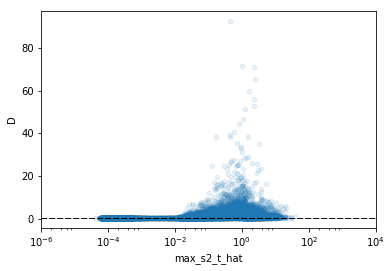

In [39]:
mll_results.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-6, 1e4), alpha=.1);
for y in mll_results.D.mode():
    plt.axhline(y, c='k', lw=1, ls='--')

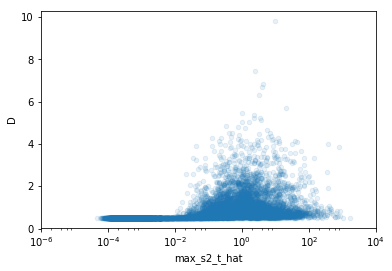

In [9]:
sim_mll_results.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-6, 1e4), alpha=.1);

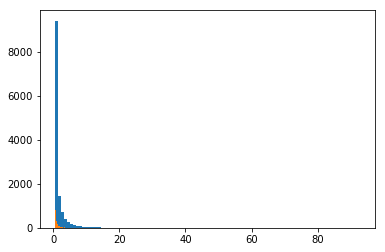

In [10]:
plt.hist(mll_results.D, bins=100);
plt.hist(sim_mll_results.D, bins=100);

In [11]:
tmp = sim_mll_results.D.sort_values().as_matrix()

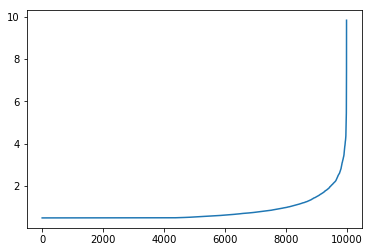

In [12]:
plt.plot(tmp);

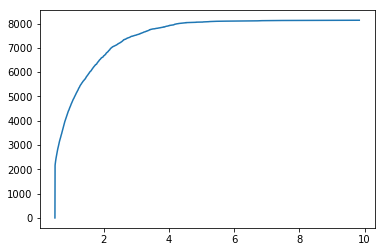

In [13]:
plt.plot(tmp, tmp.cumsum());

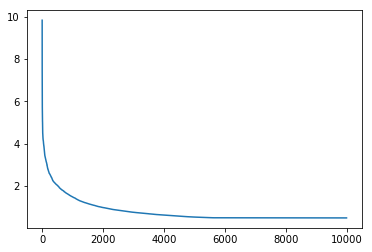

In [14]:
tmp = sim_mll_results.D.sort_values(ascending=False).as_matrix()
plt.plot(tmp);

In [15]:
from scipy import stats

In [16]:
par = stats.gamma.fit(sim_mll_results.D)
par

(0.32344337233062453, 0.49859636780655581, 1.043477591438879)

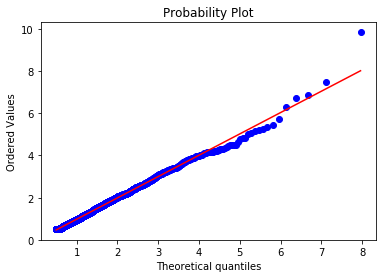

In [17]:
ax = plt.gca()
stats.probplot(tmp, dist=stats.gamma, sparams=par, plot=ax);

In [18]:
gamma_rv = stats.gamma(*par)

In [19]:
gamma_rv.sf(sim_mll_results.D.max())

1.0008404972619725e-05

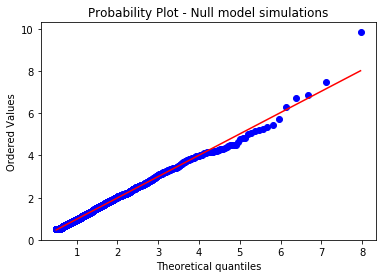

In [20]:
ax = plt.gca()
stats.probplot(sim_mll_results.D, dist=stats.gamma, sparams=par, plot=ax);
plt.title('Probability Plot - Null model simulations');
plt.savefig('probplot_MOB_sim_fit.pdf')

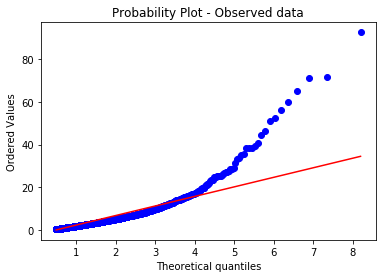

In [21]:
ax = plt.gca()
qq_res = stats.probplot(mll_results.D, dist=stats.gamma, sparams=par, plot=ax);
plt.title('Probability Plot - Observed data');
plt.savefig('probplot_MOB_observed_applied.pdf')

In [22]:
pval = gamma_rv.sf(mll_results.D)

In [23]:
mll_results['pval'] = pval

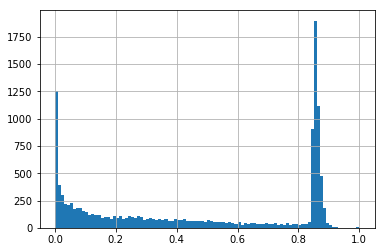

In [30]:
mll_results.pval.hist(bins=100);

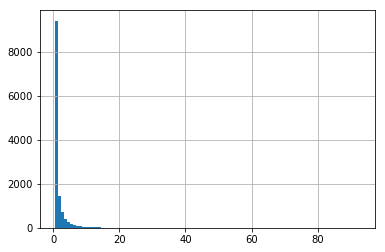

In [31]:
mll_results.D.hist(bins=100)

In [32]:
mll_results.D.describe()

count    12856.000000
mean         1.546270
std          2.943737
min          0.491309
25%          0.500579
50%          0.631229
75%          1.518132
max         92.596299
Name: D, dtype: float64

In [33]:
mll_results.D.mode()

0    0.500524
1    0.500563
2    0.500663
dtype: float64

In [34]:
gamma_rv.sf(0.5)

0.86825168867417624

In [24]:
(mll_results.shape[0] * mll_results.pval < 0.05).sum()

159

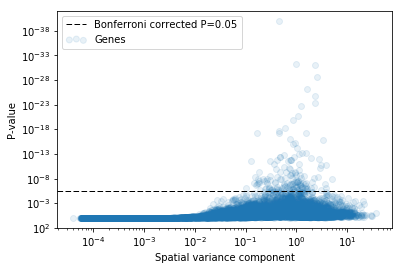

In [25]:
plt.loglog()
plt.scatter(mll_results.max_s2_t_hat, mll_results.pval, alpha=0.1, label='Genes');
plt.gca().invert_yaxis();
plt.axhline(0.05 / mll_results.shape[0], lw=1, linestyle='--', c='k', label='Bonferroni corrected P=0.05')
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');
plt.legend(scatterpoints=3);

In [43]:
sim_mll_results['pval'] = gamma_rv.sf(sim_mll_results.D)

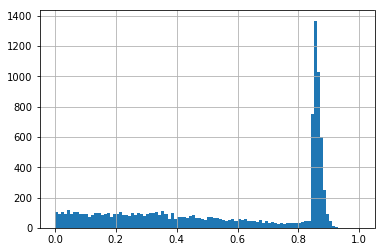

In [45]:
sim_mll_results.pval.hist(bins=100);

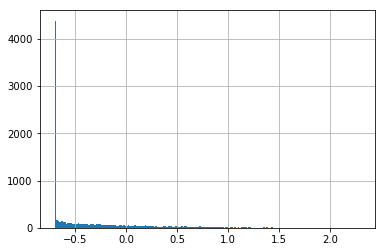

In [51]:
sim_mll_results.D.pipe(np.log).hist(bins=200);

In [52]:
sim_mll_results = pd.read_csv('BC_sim_results.csv', index_col=0)

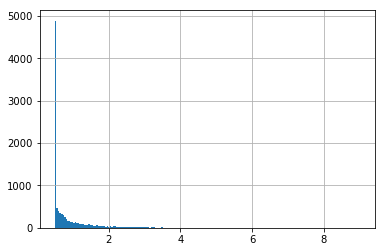

In [57]:
sim_mll_results.D.hist(bins=200);

In [58]:
par = stats.gamma.fit(sim_mll_results.D)
gamma_rv = stats.gamma(*par)

In [59]:
sim_mll_results['pval'] = gamma_rv.sf(sim_mll_results.D)

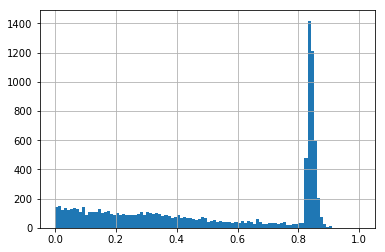

In [60]:
sim_mll_results.pval.hist(bins=100);

In [143]:
sim_mll_results = pd.read_csv('BC_sim_results.csv', index_col=0)

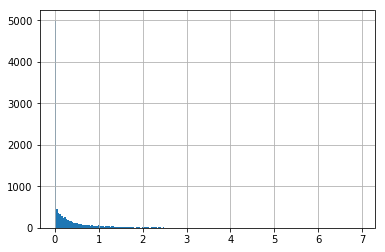

In [144]:
sim_mll_results.D.hist(bins=200);

In [145]:
par = stats.gamma.fit(sim_mll_results.D)
gamma_rv = stats.gamma(*par)

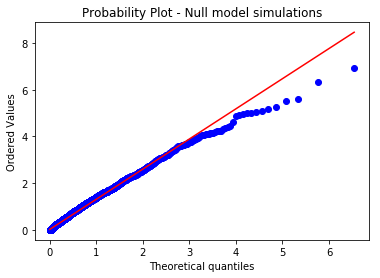

In [146]:
ax = plt.gca()
stats.probplot(sim_mll_results.D, dist=stats.gamma, sparams=par, plot=ax);
plt.title('Probability Plot - Null model simulations');

In [147]:
sim_mll_results['pval'] = gamma_rv.sf(sim_mll_results.D)

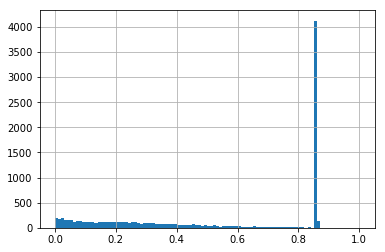

In [148]:
sim_mll_results.pval.hist(bins=100);

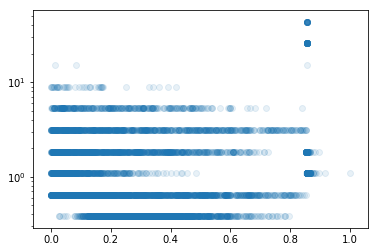

In [149]:
plt.yscale('log')
plt.scatter(sim_mll_results.pval, sim_mll_results.l, alpha=0.1);

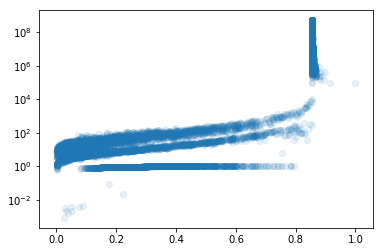

In [150]:
plt.yscale('log')
plt.scatter(sim_mll_results.pval, sim_mll_results.max_delta, alpha=0.1);

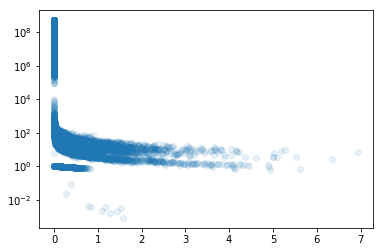

In [151]:
plt.yscale('log')
plt.scatter(sim_mll_results.D, sim_mll_results.max_delta, alpha=0.1);

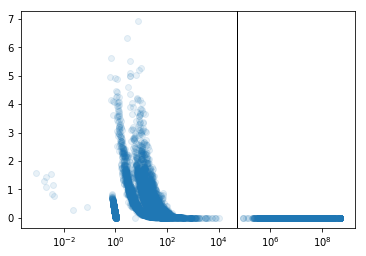

In [152]:
plt.xscale('log')
# plt.yscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.D, alpha=0.1);
plt.axvline(5e4, c='k', lw=1);

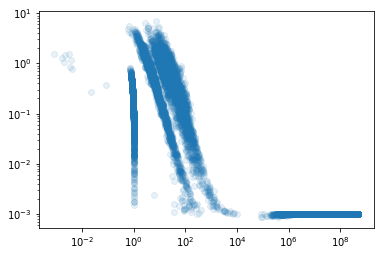

In [153]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.D, alpha=0.1);

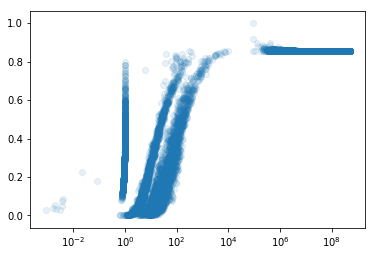

In [154]:
plt.xscale('log')
plt.scatter(sim_mll_results.max_delta, sim_mll_results.pval, alpha=0.1);

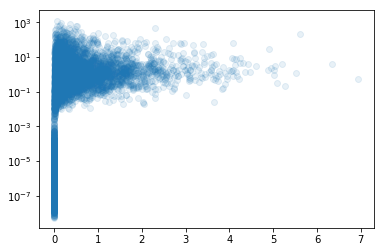

In [155]:
plt.yscale('log')
plt.scatter(sim_mll_results.D, sim_mll_results.max_s2_t_hat, alpha=0.1);

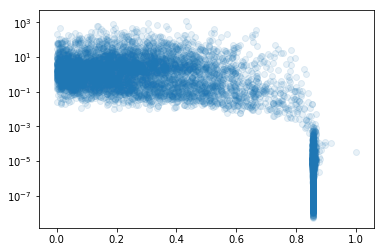

In [156]:
plt.yscale('log')
plt.scatter(sim_mll_results.pval, sim_mll_results.max_s2_t_hat, alpha=0.1);

In [103]:
np.log(sim_mll_results.max_delta.max())

20.0

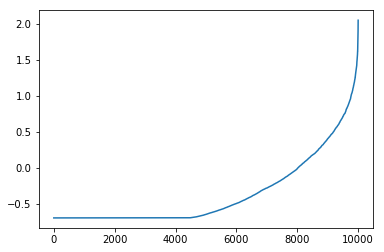

In [104]:
tmp = sim_mll_results.D.sort_values(ascending=True).as_matrix()
# plt.xscale('log')
# plt.yscale('log')
plt.plot(np.log(tmp));